## Linear models in scikit-learn

## 1. Installing and importing mglearn

In [2]:
import mglearn

## 2. Least squares

w[0]: 0.393906  b: -0.031804


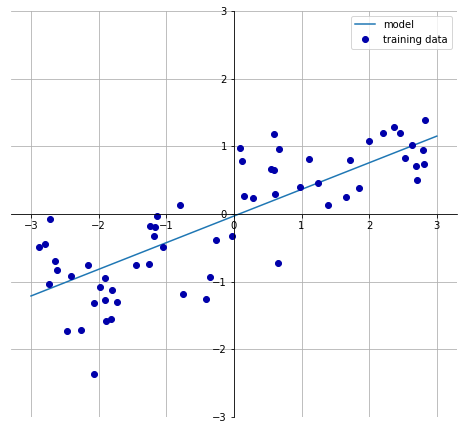

In [3]:
mglearn.plots.plot_linear_regression_wave()

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [5]:
lr.coef_

array([0.44153666])

In [6]:
lr.intercept_

-0.01711124414733381

In [7]:
lr.score(X_train, y_train)

0.6592061059587275

In [8]:
lr.score(X_test, y_test)

0.6932519118518163

In [9]:
import numpy as np
X_train_ext = np.concatenate((X_train, X_train**2),axis=1)
X_test_ext = np.concatenate((X_test, X_test**2),axis=1)

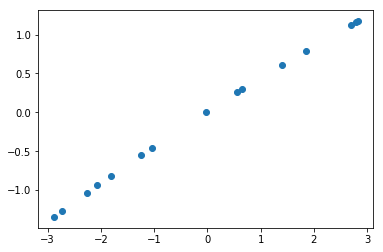

In [10]:
lr = LinearRegression().fit(X_train_ext, y_train)
y_hat = lr.predict(X_test_ext)
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X_test, y_hat)

In [11]:
print(lr.score(X_train_ext,y_train))
print(lr.score(X_test_ext,y_test))

0.6601817319830376
0.6861923283484095


In [12]:
X, y = mglearn.datasets.load_extended_boston()
X.shape

(506, 104)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [14]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.952051960903273
0.6074721959665792


## 3. Ridge Regression

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train,y_train)
ridge.score(X_train,y_train)

0.885796658517094

In [16]:
ridge.score(X_test,y_test)

0.7527683481744754

In [17]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
ridge10.score(X_train, y_train)

0.7882787115369614

In [18]:
ridge10.score(X_test,y_test)

0.6359411489177311

In [19]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01.score(X_train,y_train))
print(ridge01.score(X_test,y_test))

0.9282273685001986
0.7722067936479804


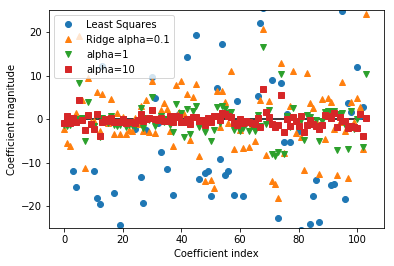

In [20]:
plt.plot(lr.coef_, 'o', label="Least Squares")
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")
plt.plot(ridge.coef_,'v',label="alpha=1")
plt.plot(ridge10.coef_,'s',label="alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)
plt.legend()

## 4. Lasso

In [21]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
lasso.score(X_train,y_train)

0.29323768991114607

In [22]:
lasso.score(X_test,y_test)

0.20937503255272294

In [23]:
np.sum(lasso.coef_ != 0)

4

In [24]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
lasso001.score(X_train,y_train)

0.8962226511086497

In [25]:
lasso001.score(X_test,y_test)

0.7656571174549983

In [26]:
np.sum(lasso001.coef_ != 0)

33

In [27]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
lasso00001.score(X_train,y_train)

0.9507158754515467

In [28]:
lasso00001.score(X_test,y_test)

0.6437467421272709

In [29]:
np.sum(lasso00001.coef_ != 0)

96

Text(0, 0.5, 'Coefficient magnitude')

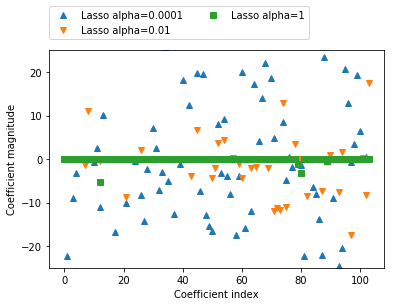

In [52]:
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.01")
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

## 5. Exercises

1. Let's try to have a look at the plots individually

(-25, 25)

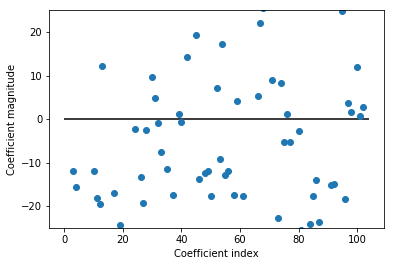

In [31]:
plt.plot(lr.coef_, 'o', label="Least Squares")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)


(-25, 25)

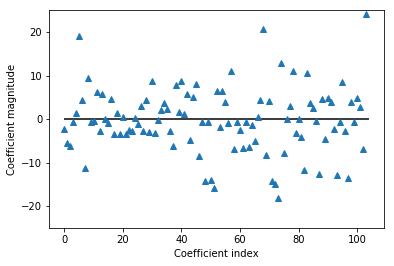

In [32]:
plt.plot(ridge01.coef_, '^', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)

(-25, 25)

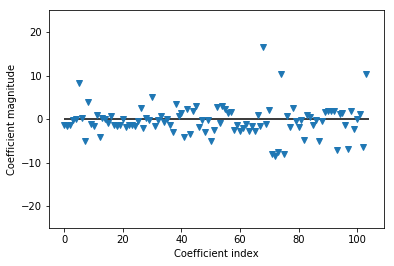

In [33]:
plt.plot(ridge.coef_,'v',label="alpha=1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)

(-25, 25)

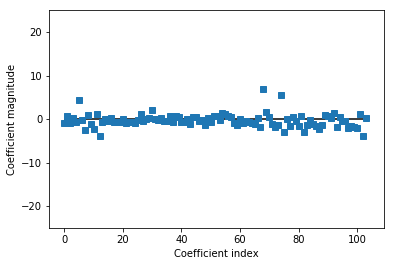

In [34]:
plt.plot(ridge10.coef_,'s',label="alpha=10")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0,0,len(lr.coef_))
plt.ylim(-25,25)

As per the four graphs above, the larger the value of aplha the coefficiens tend to be smaller. As we can see in Least Squares the coefficients are pretty scattered and opposingly in case of Ridge with aplha value 10 the coefficients are pretty close to zero but none of them seem to be exactly zero. In cases of Ridge with alpha value 0.1 and alpha value 1 lies between Least Squares and Ridge with alpha value 10.

2. role of command plt.hlines(0,0,len(lr.coef_))

In [35]:
help(plt.hlines)

Help on function hlines in module matplotlib.pyplot:

hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
    Plot horizontal lines at each *y* from *xmin* to *xmax*.
    
    Parameters
    ----------
    y : scalar or sequence of scalar
        y-indexes where to plot the lines.
    
    xmin, xmax : scalar or 1D array_like
        Respective beginning and end of each line. If scalars are
        provided, all lines will have same length.
    
    colors : array_like of colors, optional, default: 'k'
    
    linestyles : {'solid', 'dashed', 'dashdot', 'dotted'}, optional
    
    label : string, optional, default: ''
    
    Returns
    -------
    lines : `~matplotlib.collections.LineCollection`
    
    Other Parameters
    ----------------
    **kwargs :  `~matplotlib.collections.LineCollection` properties.
    
    See also
    --------
    vlines : vertical lines
    axhline: horizontal line across the axes
    
    .. note::
        In addi

plt.hlines(0,0,len(lr.coef)) draws a horizontal line at (0,0) and the length of line is given as the number of coefficients present.

3. Let's again check for individual graphs

Text(0, 0.5, 'Coefficient magnitude')

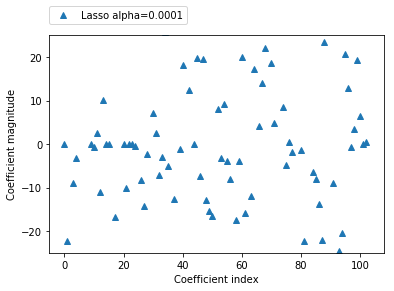

In [55]:
plt.plot(lasso00001.coef_, '^', label="Lasso alpha=0.0001")
plt.legend(ncol=1,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

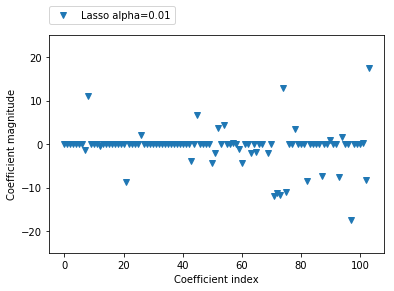

In [54]:
plt.plot(lasso001.coef_, 'v', label="Lasso alpha=0.01")
plt.legend(ncol=1,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

Text(0, 0.5, 'Coefficient magnitude')

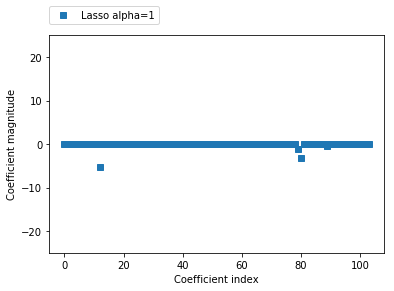

In [53]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.legend(ncol=1,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

we can generalize and say that for larger values of alpha the coefficients are smaller. In case of alpha=1 most of them are exactly zero we can see somewhat similar trend in alpha=0.01 but in case of alpha=0.0001 the coefficients are way scattered and have larger coefficient values. Yes, this is what we expected.

4. np.sum(lasso.coef_ != 0)

In [44]:
lasso.coef_ != 0

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

lasso.coef_ != 0 creates vector with boolean values and np.mean gets all the true values. Just like how we did in lab2 with iris dataset

5. plt.legend(ncol=2,loc=(0,1.05))

In [45]:
help(plt.legend)

Help on function legend in module matplotlib.pyplot:

legend(*args, **kwargs)
    Place a legend on the axes.
    
    Call signatures::
    
        legend()
        legend(labels)
        legend(handles, labels)
    
    The call signatures correspond to three different ways how to use
    this method.
    
    **1. Automatic detection of elements to be shown in the legend**
    
    The elements to be added to the legend are automatically determined,
    when you do not pass in any extra arguments.
    
    In this case, the labels are taken from the artist. You can specify
    them either at artist creation or by calling the
    :meth:`~.Artist.set_label` method on the artist::
    
        line, = ax.plot([1, 2, 3], label='Inline label')
        ax.legend()
    
    or::
    
        line.set_label('Label via method')
        line, = ax.plot([1, 2, 3])
        ax.legend()
    
    Specific lines can be excluded from the automatic legend element
    selection by defining a label st

plt.legend(ncol=2,loc(0,1.05)). It makes the plot with 2 column legend and loc defines the location of the legends in the plot here we defined a 2-tuple values which are coordinates on axes.